**If you lost points on the last checkpoint you can get them back by responding to TA/IA feedback**  

Update/change the relevant sections where you lost those points, make sure you respond on GitHub Issues to your TA/IA to call their attention to the changes you made here.

Please update your Timeline... no battle plan survives contact with the enemy, so make sure we understand how your plans have changed.

# COGS 108 - EDA Checkpoint

# Names

- Michelle Shen
- Tracy Vu
- Amber Wang
- Yoyo Wu
- Elaine Zhou

# Research Question

### How do gender-based pricing differences vary across different product categories in retail clothing?

- Is the price difference significant for male and female products in any of the clothing categories?
- If so, which clothing categories and which ones are more expensive?

Product categories:
- Apparel & Accessories (Shirts, Jeans, Jackets, etc.)

Retail clothing: 
- Zara
    



## Background and Prior Work


Recent studies have focused on the "pink tax," examining whether systematic gender-based pricing discrepancies exist for consumer products marketed to women versus men. However, findings on whether such pricing differences actually occur, especially online, have been contradictory.

For instance, a 2018 Government Accountability Office report <a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1) did not find consistent evidence of significant gender pricing differences overall across the products and brands included in their analysis.

In contrast, a more recent 2021 study <a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2) by the New York City Department of Consumer and Worker Protection did find clear pricing differences, with women’s and girls’ products costing 7% more on average than men’s and boys’ items.

These results indicate that more research is still needed to understand whether and how pricing may differ based on gender, particularly in online shopping where  price transparency and comparison should be easier. Isolating pricing differences between highly similar or identical products targeted at men versus women could provide clearer insight.



1. <a name="cite_note-1"></a> [^](#cite_ref-1) U.S. Government Accountability Office. (2018). Gender-Related Price Differences for Goods and Services. https://www.gao.gov/assets/gao-18-500.pdf
2. <a name="cite_note-2"></a> [^](#cite_ref-2) NYC Department of Consumer and Worker Protection. (2021). From Cradle to Cane: The Cost of Being a Female Consumer. . https://www1.nyc.gov/assets/dca/downloads/pdf/partners/Study-of-Gender-Pricing-in-NYC.pdf 


# Hypothesis



#### Our hypothesis is that gender-based price disparities are significant in the categories investigated and that women pay more than men for functionally identical products in different clothing categories.

We predict that this difference occurs because social norms expect women to put more effort into self-maintenance and appearance which leads to women being usually willing to pay more for products related to beauty. This inclines the sellers to increase the price of women’s products.   


# Data

## Data overview

We will be using a dataset from the Zara Clothing Collection which contains information for men's and women’s fashion items in order to answer our research question. You can click on this [link](https://www.kaggle.com/datasets/abhinavtyagi2708/zara-dataset-men-and-women-clothing) to find the data. 

In [1]:
# import statements
import pandas as pd
import numpy as numpy

In [2]:
# methods to help clean data

# return product type depending on which file is being read
def getProductType(file):
    switch_dict = {
        0: 'blazers',
        1: 'jackets',
        2: 'jeans',
        3: 'shirts',
        4: 'shoes',
        5: 'trousers'
    }
    return switch_dict.get(file, 'Other')

# import the files and add the product type to a new 'product_type' column
def import_and_add_product_type(files):
    df = pd.DataFrame()
    i = 0
    df['product_type'] = ''
    for file in files:
        new_file = pd.read_csv(files[i])
        start_index = len(df)
        end_index = start_index + len(new_file)
        product_type = getProductType(i)
        df = pd.concat([df, new_file], ignore_index=True)
        df.loc[start_index:(end_index - 1), 'product_type'] = product_type
        i += 1
        
    df = df.reset_index(drop = True)
    return df

In [3]:
pd.read_csv('BLAZERS_men.csv')
pd.read_csv('BLAZERS_women.csv')
pd.read_csv('JACKETS_men.csv')
pd.read_csv('JACKETS_women.csv')
pd.read_csv('JEANS_men.csv')
pd.read_csv('JEANS_women.csv')
pd.read_csv('SHOES_men.csv')
pd.read_csv('SHOES_women.csv')
pd.read_csv('SHIRTS_men.csv')
pd.read_csv('SHIRTS_women.csv')
pd.read_csv('TROUSERS_men.csv')
pd.read_csv('TROUSERS_women.csv')

,Unnamed: 0,Product_Name,Link,Product_Image,Price,Details
0,0,WIDE WAISTBAND LEGGINGS,https://www.zara.com/in/en/wide-waistband-legg...,[],"₹ 2,290.00",High-waist leggings with a wide elastic waistb...
1,1,PLEATED SATIN-FINISH TROUSERS,https://www.zara.com/in/en/pleated-satin-finis...,[],"₹ 2,990.00",Trousers made of pleated satin fabric. Elastic...
2,2,PRINTED FOIL TROUSERS,https://www.zara.com/in/en/printed-foil-trouse...,[],"₹ 2,990.00",High-waist trousers with an elasticated waistb...
3,3,FOIL TROUSERS,https://www.zara.com/in/en/foil-trousers-p0840...,[],"₹ 2,990.00",High-waist trousers made of metallic satin fab...
4,5,BODY SHAPING LEGGINGS,https://www.zara.com/in/en/body-shaping-leggin...,[],"₹ 2,290.00",High-waist leggings with a fitted elasticated ...
...,...,...,...,...,...,...
102,141,PARACHUTE TROUSERS,https://www.zara.com/in/en/parachute-trousers-...,[],"₹ 3,290.00",Mid-rise trousers featuring an elasticated wai...
103,144,JOGGER TROUSERS,https://www.zara.com/in/en/jogger-trousers-p07...,[],"₹ 2,590.00",High-waist cropped trousers featuring an elast...
104,146,EMBROIDERED CARGO TROUSERS,https://www.zara.com/in/en/embroidered-cargo-t...,[],"₹ 5,990.00",Mid-rise trousers with an elasticated waistban...
105,148,PRINTED CARGO TROUSERS,https://www.zara.com/in/en/printed-cargo-trous...,[],"₹ 5,990.00",Mid-rise trousers made of 100% cotton. Featuri...


## Dataset #1: Men's Clothing
- Total number of observations: 563
- Dataset Name: Mens/ Womens Zara Products
- Link to dataset: [https://www.kaggle.com/datasets/abhinavtyagi2708/zara-dataset-men-and-women-clothing](https://www.kaggle.com/datasets/abhinavtyagi2708/zara-dataset-men-and-women-clothing)
- Description: We will be using a dataset from the Zara Clothing Collection which contains information for men’s fashion items. This dataset includes categories which are listed as follows: shirts, pants, trousers, shorts, suits, jackets, accessories, etc. The features that this specific dataset contains include the following: product name, a brief textual description of the clothing item, images, and price. There were 563 individual observations recorded with 7 columns, but 4 columns were dropped during data cleaning, as they did not contain relevant information in regards to answering our research question.


In [4]:
# list of file names
men_files = ['BLAZERS_men.csv', 'JACKETS_men.csv', 'JEANS_men.csv',
            'SHIRTS_men.csv', 'SHOES_men.csv', 'TROUSERS_men.csv']

# import data add a 'product_type' column
men_data = import_and_add_product_type(men_files)

# look at the number of observations
print(men_data.shape)

men_data.head()

(563, 7)


,product_type,Unnamed: 0,product_name,link,product_images,price,details
0,blazers,0.0,BASIC BLAZER,https://www.zara.com/in/en/basic-blazer-p05899...,[{'https://static.zara.net/photos///2023/I/0/2...,"₹ 7,590.00",Straight-fit blazer with a notched lapel colla...
1,blazers,4.0,100% WOOL SUIT BLAZER - LIMITED EDITION,https://www.zara.com/in/en/100-wool-suit-blaze...,[{'https://static.zara.net/photos///2023/I/0/2...,"₹ 11,990.00",Blazer made of wool. Peak lapel collar and lon...
2,blazers,5.0,100% WOOL SUIT BLAZER,https://www.zara.com/in/en/100-wool-suit-blaze...,[{'https://static.zara.net/photos///2023/I/0/2...,"₹ 11,990.00",Blazer made of Italian wool fabric. Notch lape...
3,blazers,9.0,100% WOOL PINSTRIPE SUIT BLAZER,https://www.zara.com/in/en/100-wool-pinstripe-...,[{'https://static.zara.net/photos///2023/I/0/2...,"₹ 11,990.00",Straight fit blazer made of Italian wool fabri...
4,blazers,11.0,100% WOOL OVERSIZE BLAZER,https://www.zara.com/in/en/100-wool-oversize-b...,[{'https://static.zara.net/photos///2023/I/0/2...,"₹ 11,990.00",Oversize blazer made of wool. Notched lapel co...


As you can see, there were 563 individual observations recorded with 7 columns, but we will drop the following columns as they are not useful in the process of comparing prices:
- Unnamed: 0
- link
- product_images
- details

In [5]:
# drop unnecessary columns
men_data = men_data.drop(columns = ['Unnamed: 0', 'link', ' product_images', 'details'])

# convert categorical variables to lowercase
men_data = men_data.apply(lambda x: x.lower() if isinstance(x, str) else x)

# check for missing values
print(men_data.isna().sum())

product_type    0
product_name    0
price           0
dtype: int64


There are no missing values!

## Dataset #2: Women's Clothing
- Total number of observations: 796
- Dataset Name: Mens/ Womens Zara Products
- Link to dataset: [https://www.kaggle.com/datasets/abhinavtyagi2708/zara-dataset-men-and-women-clothing](https://www.kaggle.com/datasets/abhinavtyagi2708/zara-dataset-men-and-women-clothing)
- Description: We will be using a second dataset from the Zara Clothing Collection which contains information for women’s fashion items. Categories within this dataset include: shirts, pants, trousers, shorts/ skorts, dresses, jackets, accessories, etc. The features that this specific dataset contains include the following: product name, a brief textual description of the clothing item, images, and price. There were 796 individual observations recorded with 7 columns, but 4 columns were also dropped as they did not contain relevant information in regards to answering our research question.


In [6]:
# list of file names
women_files = ['BLAZERS_women.csv', 'JACKETS_women.csv', 'JEANS_women.csv',
                'SHIRTS_women.csv', 'SHOES_women.csv', 'TROUSERS_women.csv']

# import data and add a 'product_type' column
women_data = import_and_add_product_type(women_files)

# look at the number of observations
print(women_data.shape)

women_data.head()

(796, 7)


,product_type,Unnamed: 0,Product_Name,Link,Product_Image,Price,Details
0,blazers,0.0,TAILORED DOUBLE-BREASTED BLAZER,https://www.zara.com/in/en/tailored-double-bre...,[{'https://static.zara.net/photos///2023/I/0/1...,"₹ 5,590.00",Blazer featuring a lapel collar with long slee...
1,blazers,1.0,STRIPE TEXTURED BLAZER,https://www.zara.com/in/en/stripe-textured-bla...,[{'https://static.zara.net/photos///2023/I/0/1...,"₹ 5,990.00",Lapelless blazer with long sleeves and shoulde...
2,blazers,2.0,TAILORED WAISTCOAT,https://www.zara.com/in/en/tailored-waistcoat-...,[{'https://static.zara.net/photos///2023/I/0/1...,"₹ 2,990.00",Sleeveless waistcoat with a V-neck. Front jett...
3,blazers,3.0,STRAIGHT BLAZER,https://www.zara.com/in/en/straight-blazer-p09...,[{'https://static.zara.net/photos///2023/I/0/1...,"₹ 4,990.00",Blazer featuring a lapel collar with long slee...
4,blazers,4.0,BLAZER WITH ROLLED-UP SLEEVES,https://www.zara.com/in/en/blazer-with-rolled-...,[{'https://static.zara.net/photos///2023/I/0/1...,"₹ 4,490.00",Open blazer with a lapel collar and padded sho...


As you can see, there were 796 individual observations recorded with 7 columns, but we will drop the following columns as they are not useful in the process of comparing prices:
- Unnamed: 0
- Link
- Product_Image
- Details

In [7]:
# drop unnecessary columns
women_data = women_data.drop(columns = ['Unnamed: 0', 'Link', 'Product_Image', 'Details'])

# convert categorical variables to lowercase
women_data = women_data.apply(lambda x: x.lower() if isinstance(x, str) else x)
women_data.columns = women_data.columns.str.lower()

# check for missing values
print(women_data.isna().sum())

product_type    0
product_name    2
price           0
dtype: int64


There are two missing values in the Product_Name column, so let's see what entries those are.

In [8]:
# finding rows with missing values
print(women_data[women_data['product_name'].isna()])

    product_type product_name       price
590        shoes          NaN  ₹ 2,890.00
645        shoes          NaN  ₹ 5,590.00


Since only the product name is missing, we will just replace the name with "trousers" as this does not affect the analysis of the price.

In [9]:
# set the missing product_name to 'trousers'
women_data[women_data['product_name'].isna()] = 'trousers'

# check to ensure no more missing values
print(women_data.isna().sum())

product_type    0
product_name    0
price           0
dtype: int64


## Price Conversion
Now, we have to convert the rupees into U.S. dollars. The conversion rate is 1 rupee = 0.012 USD.

In [10]:
# delete rupee symbol and comma
men_data['price'] = pd.to_numeric(men_data['price'].str.replace('[^\d.]', '', regex=True))
women_data['price'] = pd.to_numeric(women_data['price'].str.replace('[^\d.]', '', regex=True))

# apply the conversion between rupees and USD
men_data['price'] = men_data['price'].apply(lambda x: x * 0.012)
women_data['price'] = women_data['price'].apply(lambda x: x * 0.012)

# rename the 'price' column to 'price_dollars'
men_data = men_data.rename(columns={'price': 'price_dollars'})
women_data = women_data.rename(columns={'price': 'price_dollars'})

Finally, we can display the data.

In [11]:
men_data.head(10)

,product_type,product_name,price_dollars
0,blazers,BASIC BLAZER,91.08
1,blazers,100% WOOL SUIT BLAZER - LIMITED EDITION,143.88
2,blazers,100% WOOL SUIT BLAZER,143.88
3,blazers,100% WOOL PINSTRIPE SUIT BLAZER,143.88
4,blazers,100% WOOL OVERSIZE BLAZER,143.88
5,blazers,SLIM FIT SUIT BLAZER,71.88
6,blazers,CHECKED SUIT BLAZER,115.08
7,blazers,CHECKED SUIT BLAZER,115.08
8,blazers,SUIT BLAZER,115.08
9,blazers,BLAZER WITH POCKETS,103.08


In [12]:
women_data.head(10)

,product_type,product_name,price_dollars
0,blazers,TAILORED DOUBLE-BREASTED BLAZER,67.08
1,blazers,STRIPE TEXTURED BLAZER,71.88
2,blazers,TAILORED WAISTCOAT,35.88
3,blazers,STRAIGHT BLAZER,59.88
4,blazers,BLAZER WITH ROLLED-UP SLEEVES,53.88
5,blazers,HIGH NECK TEXTURED BLAZER,71.88
6,blazers,SHORT TAILORED WAISTCOAT,35.88
7,blazers,FITTED BLAZER WITH SEAMS,71.88
8,blazers,LONG BLAZER WITH BELT,91.08
9,blazers,CROPPED BLAZER WITH FEATHERS,143.88


# Results

## Exploratory Data Analysis

Carry out whatever EDA you need to for your project.  Because every project will be different we can't really give you much of a template at this point. But please make sure you describe the what and why in text here as well as providing interpretation of results and context.

### Distribution of prices of the different clothing categories

First, let's look at the summary of our data sets to see the overall distribution of price of men's and women's fashion items in Zara.

In [13]:
# import plotting statements
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
men_data.describe()

,price_dollars
count,563.000000
mean,57.673961
std,25.122417
min,17.880000
25%,39.480000
50%,47.880000
75%,59.880000
max,191.880000


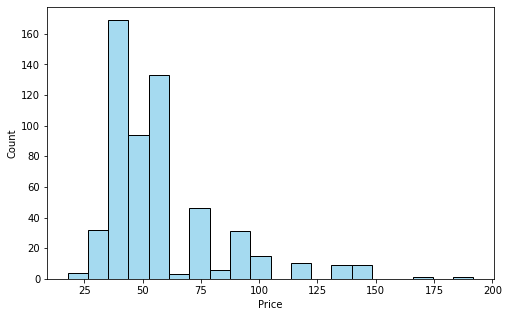

In [53]:
# distribution of the price of all of the men's clothing categories 
plt.figure(figsize=(8,5))
sns.histplot(men_data['price_dollars'], bins=20, color='skyblue')
plt.xlabel('Price')
plt.show()

In [16]:
women_data.describe()

,price_dollars
count,793.000000
mean,50.370794
std,18.846724
min,23.880000
25%,35.880000
50%,39.480000
75%,59.880000
max,155.880000


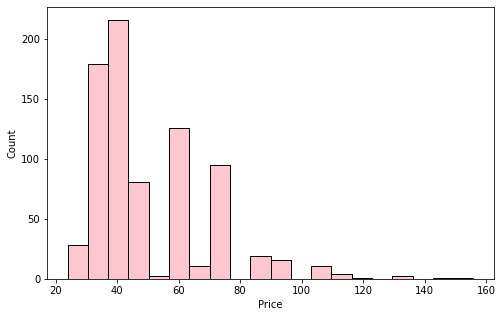

In [51]:
# distribution of the price of all of the women's clothing categories 
plt.figure(figsize=(8,5))
sns.histplot(women_data['price_dollars'], bins=20, color='lightpink')
plt.xlabel('Price')
plt.show()

From the summary of data we have above, we can see that men's data has a a larger range and a slightly higher mean price. So now let's look the breakdown of the distribution of price in each of the clothing categories.

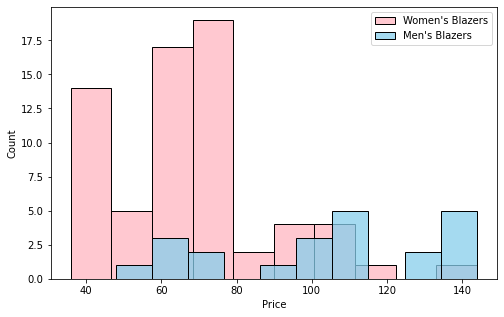

In [18]:
# the distribution of the prices of blazers
men_blazers = men_data[men_data['product_type'] == 'blazers']
women_blazers = women_data[women_data['product_type'] == 'blazers']

plt.figure(figsize=(8,5))
sns.histplot(data=women_blazers, x='price_dollars', bins=10, color='lightpink', label="Women's Blazers")
sns.histplot(data=men_blazers, x='price_dollars', bins=10, color='skyblue', label="Men's Blazers")

plt.xlabel('Price')
plt.ylabel('Count')
plt.legend()

plt.show()

In [19]:
print("The mean price of men's blazers is " + str(men_blazers['price_dollars'].mean()))
print("The mean price of women's blazers is " + str(women_blazers['price_dollars'].mean()))

The mean price of men's blazers is 105.91636363636366
The mean price of women's blazers is 65.2889552238806


From the histogram, we can see that the price distribution of women's blazers shows a positive skew, indicating that there are relatively fewer high-priced items. In contrast, the distribution for men's blazers appears more uniform, suggesting a relatively even spread of prices. It is hard for us to compare the central tendency due to the differing counts of blazers for men and women.

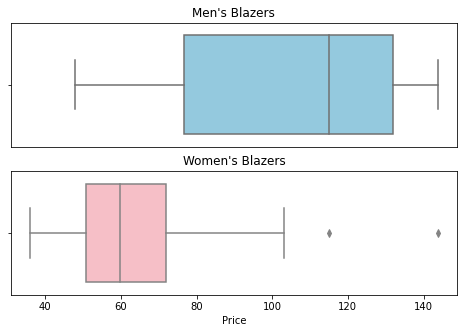

In [56]:
# price range of blazers
price_min = min(men_blazers['price_dollars'].min(), women_blazers['price_dollars'].min())-5
price_max = max(men_blazers['price_dollars'].max(), women_blazers['price_dollars'].max())+5

plt.figure(figsize=(8,5))

plt.subplot(2, 1, 1)
sns.boxplot(data=men_blazers, x='price_dollars', color='skyblue')
plt.title("Men's Blazers")
plt.xlabel('')
plt.xticks([])
plt.xlim(price_min, price_max)

plt.subplot(2, 1, 2)
sns.boxplot(data=women_blazers, x='price_dollars', color='lightpink')
plt.title("Women's Blazers")
plt.xlim(price_min, price_max)
plt.xlabel('Price')

plt.show()

In [21]:
print("The range of the price of men's blazers is " + str(men_blazers['price_dollars'].max()-men_blazers['price_dollars'].min()))
print("The range of the price of women's blazers is " + str(women_blazers['price_dollars'].max()-women_blazers['price_dollars'].min()))

The range of the price of men's blazers is 96.0
The range of the price of women's blazers is 108.0


From the boxplot, we can see that while women's blazers have 2 outliers, which indicates exceptionally higher prices. Yet men's blazers do not have any outlier, which indicates that the price is more consistent. We can also see that the range of the price of women's blazers is larger than men's.

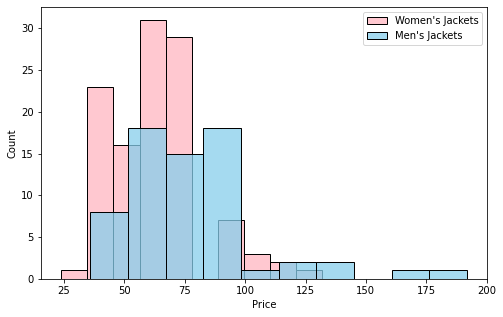

In [22]:
# the distribution of the prices of jackets
men_jackets = men_data[men_data['product_type'] == 'jackets']
women_jackets = women_data[women_data['product_type'] == 'jackets']

plt.figure(figsize=(8,5))
sns.histplot(data=women_jackets, x='price_dollars', bins=10, color='lightpink', label="Women's Jackets")
sns.histplot(data=men_jackets, x='price_dollars', bins=10, color='skyblue', label="Men's Jackets")

plt.xlabel('Price')
plt.ylabel('Count')
plt.legend()

plt.show()

In [23]:
print("The mean price of men's jackets is " + str(men_jackets['price_dollars'].mean()))
print("The mean price of women's jackets is " + str(women_jackets['price_dollars'].mean()))

The mean price of men's jackets is 77.06181818181818
The mean price of women's jackets is 61.18619469026549


From the histogram, we can see that the price distribution of both women's and men's jackets are positively skewed, indicating that the majority of blazers have low prices. Yet we can also note that there are some higher-priced items for men's jackets. It is hard for us to compare the central tendency due to the differing counts of jackets for men and women.

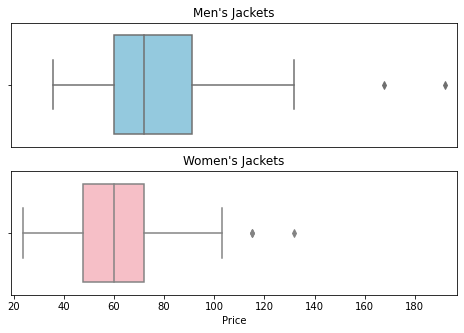

In [24]:
# price range of jackets
price_min = min(men_jackets['price_dollars'].min(), women_jackets['price_dollars'].min())-5
price_max = max(men_jackets['price_dollars'].max(), women_jackets['price_dollars'].max())+5


plt.figure(figsize=(8,5))

plt.subplot(2, 1, 1)
sns.boxplot(data=men_jackets, x='price_dollars', color='skyblue')
plt.title("Men's Jackets")
plt.xlabel('')
plt.xticks([])
plt.xlim(price_min, price_max)

plt.subplot(2, 1, 2)
sns.boxplot(data=women_jackets, x='price_dollars', color='lightpink')
plt.title("Women's Jackets")
plt.xlim(price_min, price_max)
plt.xlabel('Price')

plt.show()

In [25]:
print("The range of the price of men's jackets is " + str(men_jackets['price_dollars'].max()-men_jackets['price_dollars'].min()))
print("The range of the price of women's jackets is " + str(women_jackets['price_dollars'].max()-women_jackets['price_dollars'].min()))

The range of the price of men's jackets is 156.0
The range of the price of women's jackets is 108.0


From the boxplot, we can see that both women's and men's jackets have 2 outliers, showing exceptionally higher prices. The outliers for men's jackets have higher prices thatn women's jackets too. We can also see that the range of the price of men's jackets is larger than women's.

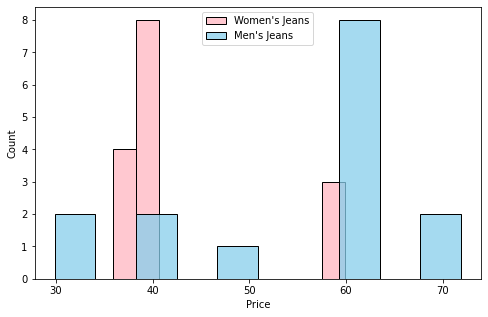

In [26]:
# the distribution of the prices of jeans
men_jeans = men_data[men_data['product_type'] == 'jeans']
women_jeans = women_data[women_data['product_type'] == 'jeans']

plt.figure(figsize=(8,5))
sns.histplot(data=women_jeans, x='price_dollars', bins=10, color='lightpink', label="Women's Jeans")
sns.histplot(data=men_jeans, x='price_dollars', bins=10, color='skyblue', label="Men's Jeans")

plt.xlabel('Price')
plt.ylabel('Count')
plt.legend()

plt.show()

In [27]:
print("The mean price of men's jeans is " + str(men_jeans['price_dollars'].mean()))
print("The mean price of women's jeans is " + str(women_jeans['price_dollars'].mean()))

The mean price of men's jeans is 53.96
The mean price of women's jeans is 42.60000000000001


From the histogram, we can see that the price distribution of both women's and men's jeans does not exhibit a clear pattern, suggesting a lack of uniformity. Yet we can see that overall, men's jeans have more counts in the upper price range than women's jeans. Thus we can say that the most common price range for men's jeans is higher than women's.

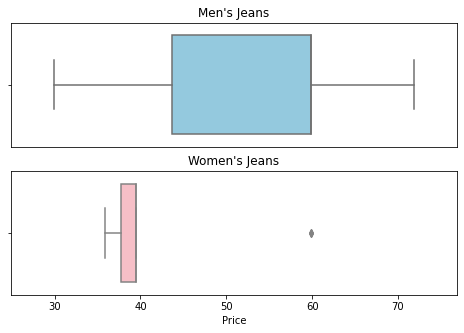

In [28]:
# price range of jeans
price_min = min(men_jeans['price_dollars'].min(), women_jeans['price_dollars'].min())-5
price_max = max(men_jeans['price_dollars'].max(), women_jeans['price_dollars'].max())+5


plt.figure(figsize=(8,5))

plt.subplot(2, 1, 1)
sns.boxplot(data=men_jeans, x='price_dollars', color='skyblue')
plt.title("Men's Jeans")
plt.xlabel('')
plt.xticks([])
plt.xlim(price_min, price_max)

plt.subplot(2, 1, 2)
sns.boxplot(data=women_jeans, x='price_dollars', color='lightpink')
plt.title("Women's Jeans")
plt.xlim(price_min, price_max)
plt.xlabel('Price')

plt.show()

In [29]:
print("The range of the price of men's jeans is " + str(men_jeans['price_dollars'].max()-men_jeans['price_dollars'].min()))
print("The range of the price of women's jeans is " + str(women_jeans['price_dollars'].max()-women_jeans['price_dollars'].min()))

The range of the price of men's jeans is 42.0
The range of the price of women's jeans is 24.0


From the boxplot, we can see that while women's jeans have 1 outlier, men's blazers do not have any outlier, men's jeans do not have any outlier. We can also see that there is a substantial difference in the price range between men's and women's jeans

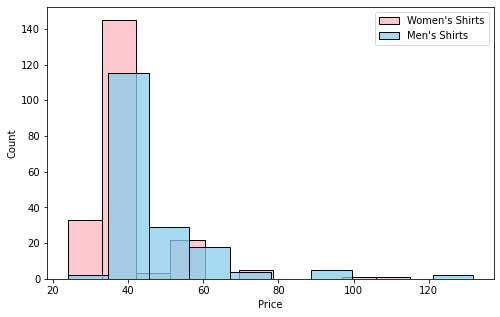

In [30]:
# the distribution of the prices of shirts
men_shirts = men_data[men_data['product_type'] == 'shirts']
women_shirts = women_data[women_data['product_type'] == 'shirts']

plt.figure(figsize=(8,5))
sns.histplot(data=women_shirts, x='price_dollars', bins=10, color='lightpink', label="Women's Shirts")
sns.histplot(data=men_shirts, x='price_dollars', bins=10, color='skyblue', label="Men's Shirts")

plt.xlabel('Price')
plt.ylabel('Count')
plt.legend()

plt.show()

In [31]:
print("The mean price of men's shirts is " + str(men_shirts['price_dollars'].mean()))
print("The mean price of women's shirts is " + str(women_shirts['price_dollars'].mean()))

The mean price of men's shirts is 45.77485714285716
The mean price of women's shirts is 40.440000000000005


From the histogram, we can see that the price distribution of both women's and men's shirts show a positive skew, indicating that there are mostly low-priced items. The central tendency of both women's and men's shirts appears similar, reflected in their similar histogram shapes, despite that women's shirts have a higher count.

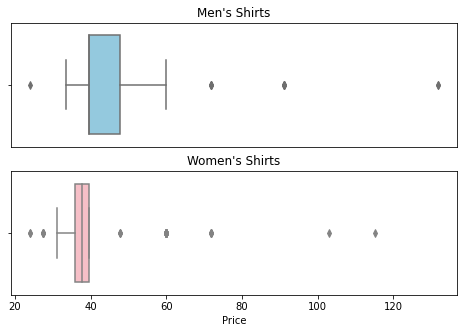

In [32]:
# price range of shirts
price_min = min(men_shirts['price_dollars'].min(), women_shirts['price_dollars'].min())-5
price_max = max(men_shirts['price_dollars'].max(), women_shirts['price_dollars'].max())+5


plt.figure(figsize=(8,5))

plt.subplot(2, 1, 1)
sns.boxplot(data=men_shirts, x='price_dollars', color='skyblue')
plt.title("Men's Shirts")
plt.xlabel('')
plt.xticks([])
plt.xlim(price_min, price_max)

plt.subplot(2, 1, 2)
sns.boxplot(data=women_shirts, x='price_dollars', color='lightpink')
plt.title("Women's Shirts")
plt.xlim(price_min, price_max)
plt.xlabel('Price')

plt.show()

In [33]:
print("The range of the price of men's shirts is " + str(men_shirts['price_dollars'].max()-men_shirts['price_dollars'].min()))
print("The range of the price of women's shirts is " + str(women_shirts['price_dollars'].max()-women_shirts['price_dollars'].min()))

The range of the price of men's shirts is 108.0
The range of the price of women's shirts is 91.2


From the boxplot, we can see that there are many outliers for both men's and women's shirts, and they have both exceptionally high and low prices. Women's shirts, in particular, have a greater number of outliers compared to men's. We can also see that the range of the price of men's shirts is larger than women's.

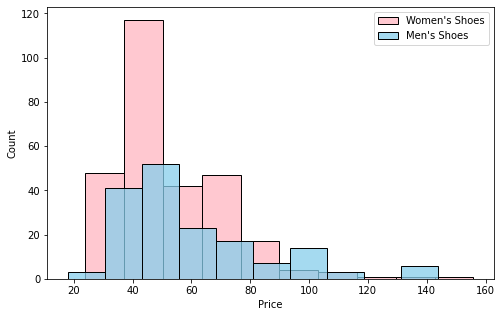

In [34]:
# the distribution of the prices of shoes
men_shoes = men_data[men_data['product_type'] == 'shoes']
women_shoes = women_data[women_data['product_type'] == 'shoes']

plt.figure(figsize=(8,5))
sns.histplot(data=women_shoes, x='price_dollars', bins=10, color='lightpink', label="Women's Shoes")
sns.histplot(data=men_shoes, x='price_dollars', bins=10, color='skyblue', label="Men's Shoes")

plt.xlabel('Price')
plt.ylabel('Count')
plt.legend()

plt.show()

In [35]:
print("The mean price of men's shoes is " + str(men_shoes['price_dollars'].mean()))
print("The mean price of women's shoes is " + str(women_shoes['price_dollars'].mean()))

The mean price of men's shoes is 59.8655421686747
The mean price of women's shoes is 53.48711743772242


From the histogram, we can see that the price distribution of both women's and men's shoes are positively skewed, indicating that there are mostly low-priced items. The central tendency of both women's and men's shirts appears similar, reflected in their similar histogram shapes, even though women's shoes have a higher count.

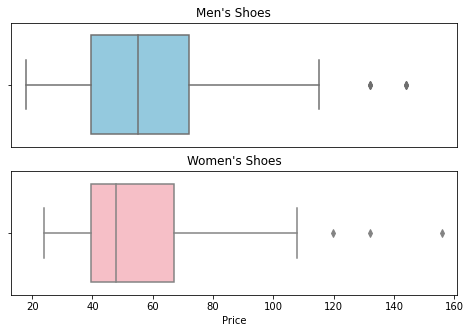

In [36]:
# price range of shoes
price_min = min(men_shoes['price_dollars'].min(), women_shoes['price_dollars'].min())-5
price_max = max(men_shoes['price_dollars'].max(), women_shoes['price_dollars'].max())+5


plt.figure(figsize=(8,5))

plt.subplot(2, 1, 1)
sns.boxplot(data=men_shoes, x='price_dollars', color='skyblue')
plt.title("Men's Shoes")
plt.xlabel('')
plt.xticks([])
plt.xlim(price_min, price_max)

plt.subplot(2, 1, 2)
sns.boxplot(data=women_shoes, x='price_dollars', color='lightpink')
plt.title("Women's Shoes")
plt.xlim(price_min, price_max)
plt.xlabel('Price')

plt.show()

In [37]:
print("The range of the price of men's shoes is " + str(men_shoes['price_dollars'].max()-men_shoes['price_dollars'].min()))
print("The range of the price of women's shoes is " + str(women_shoes['price_dollars'].max()-women_shoes['price_dollars'].min()))

The range of the price of men's shoes is 126.0
The range of the price of women's shoes is 132.0


From the boxplot, we can see that there are outliers for both men's and women's shoes, with women's shoes having 1 more outlier than men's. We can also see that the range of the price of men's shoes is larger than women's. Notably, the overall distribution of prices appears similar for men's and women's shoes when compared to the plots we observed previously.

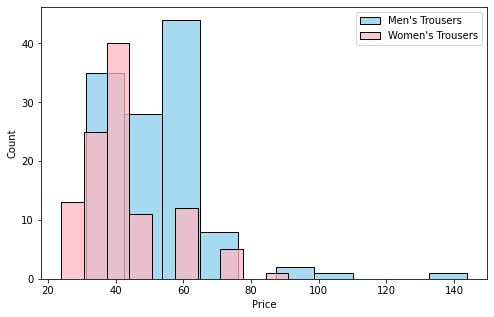

In [38]:
# the distribution of the prices of trousers
men_trousers = men_data[men_data['product_type'] == 'trousers']
women_trousers = women_data[women_data['product_type'] == 'trousers']

plt.figure(figsize=(8,5))
sns.histplot(data=men_trousers, x='price_dollars', bins=10, color='skyblue', label="Men's Trousers")
sns.histplot(data=women_trousers, x='price_dollars', bins=10, color='lightpink', label="Women's Trousers")

plt.xlabel('Price')
plt.ylabel('Count')
plt.legend()

plt.show()

In [39]:
print("The mean price of men's trousers is " + str(men_trousers['price_dollars'].mean()))
print("The mean price of women's trousers is " + str(women_trousers['price_dollars'].mean()))

The mean price of men's trousers is 52.91193277310925
The mean price of women's trousers is 42.00336448598131


From the histogram, we can see that the price distribution of both men's and women's trousers can be considered positively skewed, with women's trousers having more counts in the lower-priced range. We can also see that men's trousers have more tails than women's, which we can suggest a higher central tendency for men's trousers compared to women's.

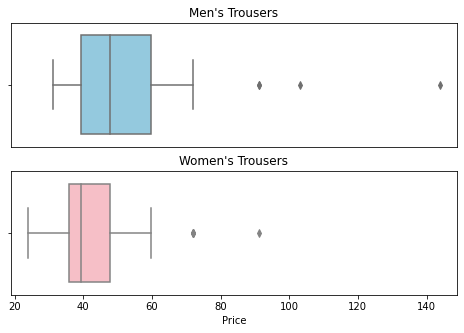

In [40]:
# price range of trousers
price_min = min(men_trousers['price_dollars'].min(), women_trousers['price_dollars'].min())-5
price_max = max(men_trousers['price_dollars'].max(), women_trousers['price_dollars'].max())+5


plt.figure(figsize=(8,5))

plt.subplot(2, 1, 1)
sns.boxplot(data=men_trousers, x='price_dollars', color='skyblue')
plt.title("Men's Trousers")
plt.xlabel('')
plt.xticks([])
plt.xlim(price_min, price_max)

plt.subplot(2, 1, 2)
sns.boxplot(data=women_trousers, x='price_dollars', color='lightpink')
plt.title("Women's Trousers")
plt.xlim(price_min, price_max)
plt.xlabel('Price')

plt.show()

In [41]:
print("The range of the price of men's trousers is " + str(men_trousers['price_dollars'].max()-men_trousers['price_dollars'].min()))
print("The range of the price of women's trousers is " + str(women_trousers['price_dollars'].max()-women_trousers['price_dollars'].min()))

The range of the price of men's trousers is 112.8
The range of the price of women's trousers is 67.2


From the boxplot, we can see that there are outliers for both men's and women's trousers, with men's trousers having 1 more outlier than women's. We can also see that the range of the price of men's shoes is larger than women's.

Looking at the distributions, it seems like men’s products actually have higher mean prices and larger ranges in prices. So, let's take a look at how the mean price and range vary between each categories and between the two genders by putting all the data together.

In [42]:
# combine men and women's data together 
men_data['gender'] = 'men'
women_data['gender'] = 'women'

combined_data = pd.concat([men_data, women_data])

Text(0, 0.5, 'Mean Price')

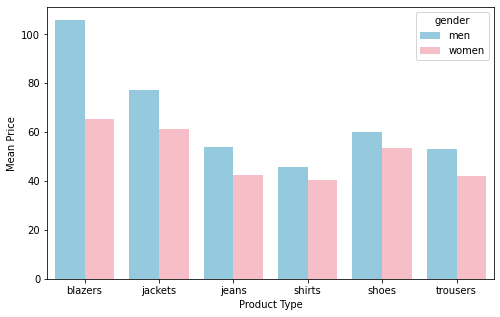

In [43]:
# take a look at the mean price of each categories together
mean_price = combined_data.groupby(['product_type', 'gender'])['price_dollars'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=mean_price, x='product_type', y='price_dollars', hue='gender', ci=None,
           palette={'men': 'skyblue', 'women': 'lightpink'})

plt.xlabel('Product Type')
plt.ylabel('Mean Price')

From the barplot, we can see that overall, men's products have higher mean prices. While the mean prices of women's products are relatively close, men's products exhibit a greater degree of variability in their mean prices.

Text(0, 0.5, 'Price Range')

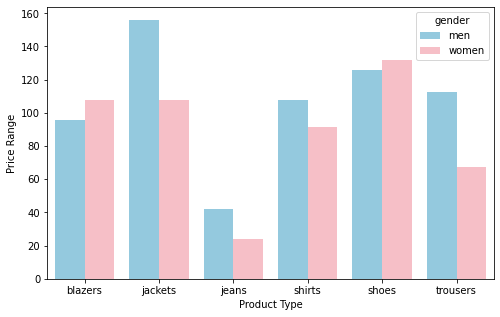

In [44]:
# take a look at the price range of each categories together
price_range = combined_data.groupby(['product_type', 'gender'])['price_dollars'].agg(['min', 'max']).reset_index()
price_range['price_range'] = price_range['max'] - price_range['min']

plt.figure(figsize=(8,5))
sns.barplot(data=price_range, x='product_type', y='price_range', hue='gender', ci=None,
           palette={'men': 'skyblue', 'women': 'lightpink'})

plt.xlabel('Product Type')
plt.ylabel('Price Range')

From the barplot, we can see that for jackets, jeans, shirts and trousers, the range of the price is higher for men, while for blazers and shoes, the range of price is higher for women.

Text(0, 0.5, 'Count')

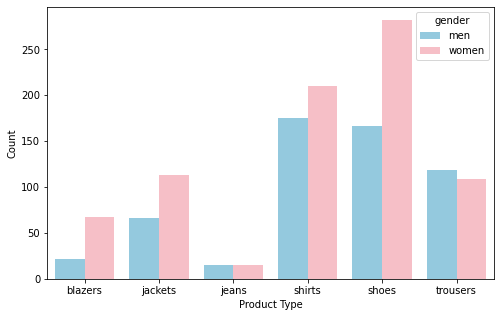

In [45]:
# take a look at the number of items in each categories 
count = combined_data.groupby(['product_type', 'gender']).size().reset_index(name='count')

plt.figure(figsize=(8,5))
sns.barplot(data=count, x='product_type', y='count', hue='gender', palette={'men': 'skyblue', 'women': 'lightpink'})
plt.xlabel('Product Type')
plt.ylabel('Count')

From the barplot, we can see that while men's products have overall higher mean price and larger ranges, women's products have a higher count across the categories.

# Ethics & Privacy

Given the all-girl composition of our group, we want to avoid confirmation bias throughout the data collection, cleaning, analysis process, which may lead us to focus on and keep only data that supports our hypothesis while ignoring contradictory evidence.
To avoid this, we need to consider and include datasets that encompass both male and female products with consideration for all the population that should be present under our question. 

In practice, this means to also select datasets from sources that were unrelated to the topic of pink tax, or even ones that contradict the idea that women have to pay more for everyday items, so to obtain all possible perspectives and form an honest, well-rounded analysis. We also need to consider that not all women may be impacted by the Pink Tax equally. For example, the pink tax may disproportionately affect women of color or transgender individuals. We need to ensure that we have an equitable interpretation and collection of data. 

Our personal experiences can introduce subjective biases when communicating our findings. Therefore, in all stages of writing, we would aim to convey findings based on statistical proof and with objective, matter-of-fact language。 

If there is significant evidence in our analysis showing that pink tax does exist, one ethical concern is the tendency in interpretation to blame consumers for supporting and enabling the pink tax by choosing to buy certain higher-priced products. When involving and implying consumer choices as the causing factor of pink tax, the interpretation of our analysis may unintentionally strengthen gender stereotypes regarding appearance maintenance. Therefore, we would also need to consider companies’ perspective of their reactions to differences in production cost and market demand as a factor for our findings. 


# Team Expectations 


* *The team’s preferred method of communication is through text. When directed, all members should respond within 8-12 hours.*  

* *The team will meet through Zoom every Wednesday 2-3pm. If unforeseen circumstances occur, the member should let the team know by Tuesday or earlier.*
* *The team’s preferred method of collaboration is Google Docs for text submissions to review each others’ work more timely. For coding sections, data processing, and final review, Git.*
* *Team members will be evenly assigned works based on their proposed strengths after mutual agreements in the weekly meetings.*
* *They are expected to complete said work before the appointment. If failed or unable to do so due to unforeseen circumstances, they must communicate and notify the rest of the team as soon as possible.*
* *If conflicts or differences of opinions occur, the members should support their arguments without any comments directed at a personal level. If unable to come to an understanding or a single point of view, members will defer to the result of an anonymous poll.*


# Project Timeline Proposal



| Week  | Meeting Date+Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 5 |  Wed. 11/1, 2-3pm | Decide on project topic  | Finalize: research question, hypothesis, team expectations and timeline；Assign group members for specific proposal sections；Finalize timeline；Assign group members to lead specific parts of project；Find data sets | 
| 6 |  Wed. 11/8, 2-3pm |  Find datasets: Elaine | Discuss Wrangling and possible analytical approaches | 
| 7 |  Wed. 11/15, 2-3pm  | Finalize data wrangling: Michelle  | Review/Edit wrangling; Discuss EDA  |
| 8 | Wed. 11/22, 2-3pm  | Finalize EDA: Amber | Review/Edit EDA; Discuss Analysis Plan   |
| 9 | Wed. 11/29, 2-3pm  | Finalize Analysis: Yoyo | Review/edit Analysis; Discuss results/conclusion/discussion |
| 10 | Wed. 12/6, 2-3pm  | Finalize results/conclusion/discussion: Tracy | Review results, conclusion, discussion; discuss any final edits; discuss how to make video |
| 11/Final | Wed. 12/13, 2-3pm  | Finish Project | Make video |